### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
import pandas as pd

df1 = pd.read_csv(url)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

faturamento_total = {
    "Loja 1": df1["Preço"].sum(),
    "Loja 2": df2["Preço"].sum(),
    "Loja 3": df3["Preço"].sum(),
    "Loja 4": df4["Preço"].sum()
}

for loja, valor in faturamento_total.items():
    print(f"{loja}: R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

faturamento_geral = sum(faturamento_total.values())
print(f"\nFaturamento total das 4 lojas: R$ {faturamento_geral:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58

Faturamento total das 4 lojas: R$ 5.871.490,79


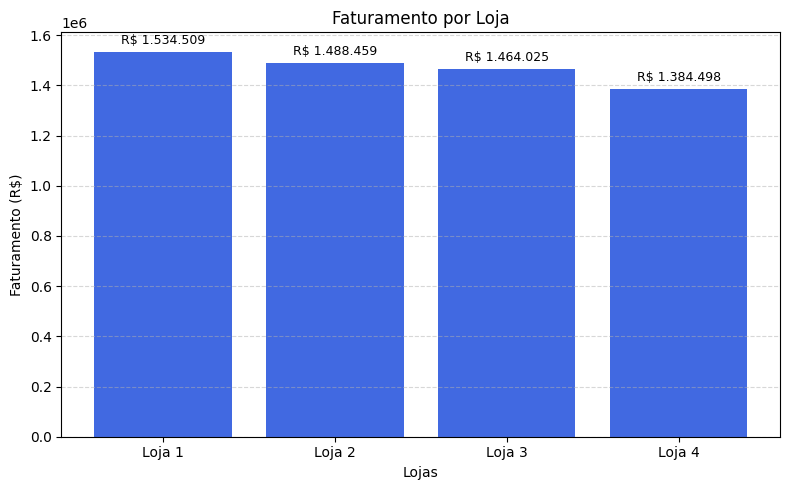

In [9]:
import matplotlib.pyplot as plt

lojas = list(faturamento_total.keys())
valores = list(faturamento_total.values())

plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, valores, color='royalblue')

plt.title("Faturamento por Loja")
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 20000,
             f"R$ {valor:,.0f}".replace(",", "X").replace(".", ",").replace("X", "."),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria



Vendas por Categoria - Loja 1
Total de itens vendidos: 2359
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171

Vendas por Categoria - Loja 2
Total de itens vendidos: 2359
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181

Vendas por Categoria - Loja 3
Total de itens vendidos: 2359
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177

Vendas por Categoria - Loja 4
Total de itens vendidos: 23

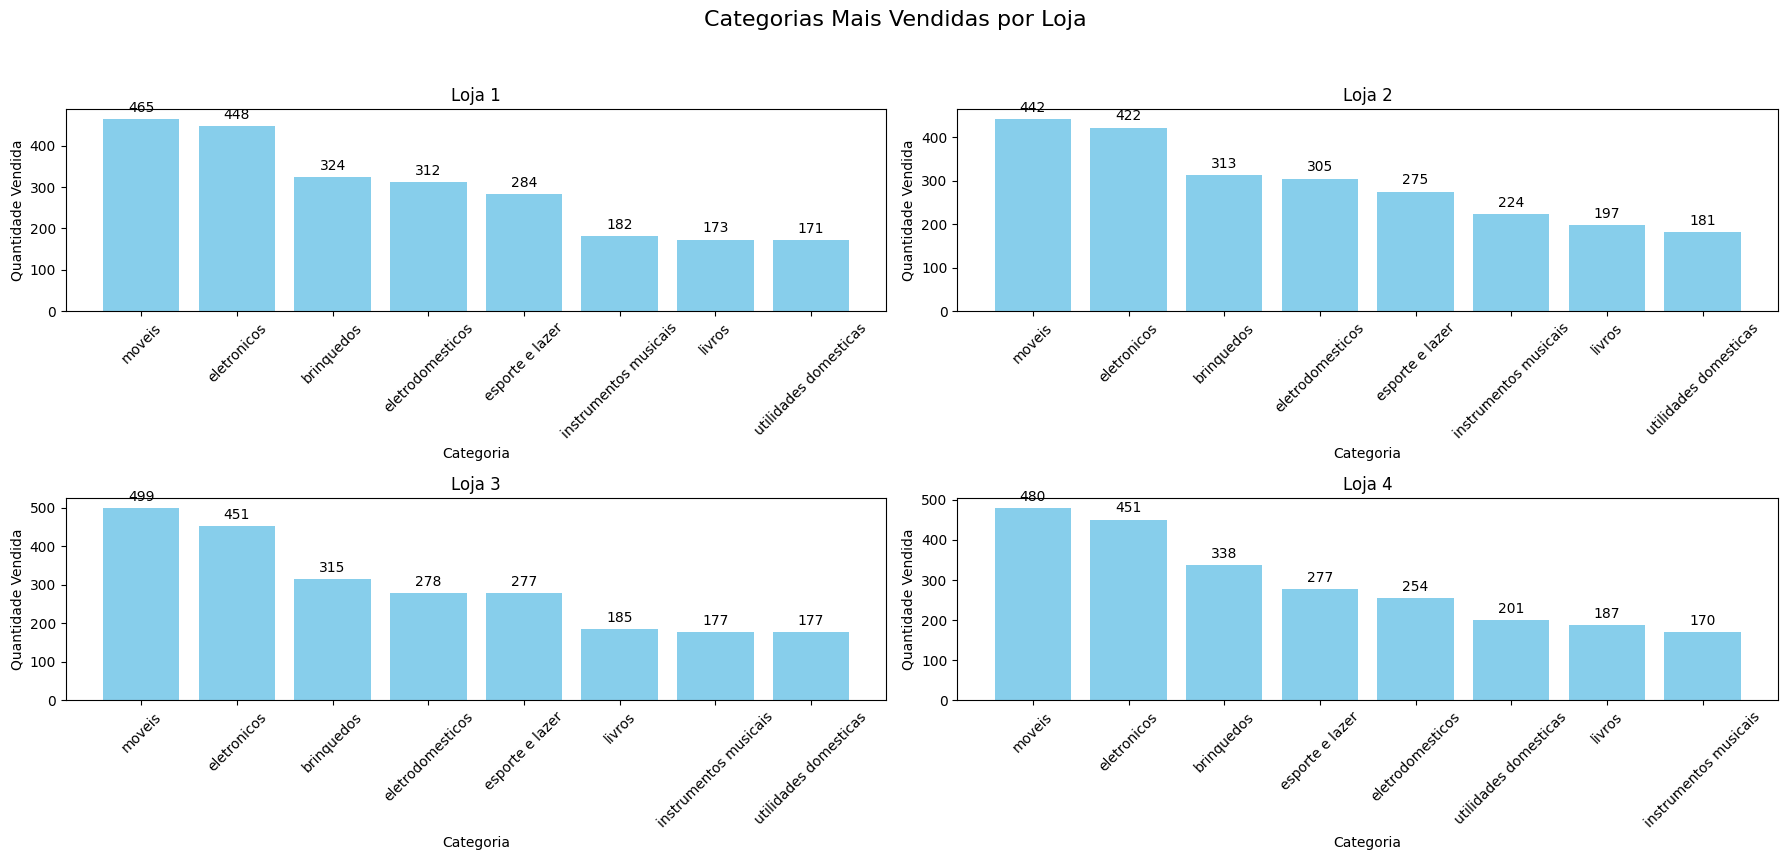

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

lojas = {
    'Loja 1': df1,
    'Loja 2': df2,
    'Loja 3': df3,
    'Loja 4': df4
}

for nome_loja, df in lojas.items():
    print(f'\nVendas por Categoria - {nome_loja}')
    categorias = df['Categoria do Produto'].value_counts()
    total_vendas = categorias.sum()
    print(f'Total de itens vendidos: {total_vendas}')
    print(categorias.to_string())

fig, axs = plt.subplots(2, 2, figsize=(18, 9))
fig.suptitle('Categorias Mais Vendidas por Loja', fontsize=16)

for i, (nome_loja, df) in enumerate(lojas.items()):
    categorias = df['Categoria do Produto'].value_counts()

    ax = axs[i // 2, i % 2]
    bars = ax.bar(categorias.index, categorias.values, color='skyblue')

    ax.set_title(nome_loja)
    ax.set_ylabel('Quantidade Vendida')
    ax.set_xlabel('Categoria')
    ax.tick_params(axis='x', rotation=45)

    ax.bar_label(bars, labels=categorias.values, padding=3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [22]:
dados_resultados = []

for nome_loja, df in lojas.items():
    contagem_categorias = df['Categoria do Produto'].value_counts()
    categoria_popular = contagem_categorias.idxmax()
    quantidade = contagem_categorias.max()

    dados_resultados.append({
        'Loja': nome_loja,
        'Categoria Mais Popular': categoria_popular,
        'Quantidade Vendida': quantidade
    })

resultados = pd.DataFrame(dados_resultados)

print("Categorias mais populares por loja:")
print(resultados.to_string(index=False))

Categorias mais populares por loja:
  Loja Categoria Mais Popular  Quantidade Vendida
Loja 1                 moveis                 465
Loja 2                 moveis                 442
Loja 3                 moveis                 499
Loja 4                 moveis                 480


# 3. Média de Avaliação das Lojas


Média de Avaliações por Loja:
A média das avaliações da Loja 1: 3.98
A média das avaliações da Loja 2: 4.04
A média das avaliações da Loja 3: 4.05
A média das avaliações da Loja 4: 4.00


/tmp/ipython-input-1760894837.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Loja', y='Média', data=df_resultados,


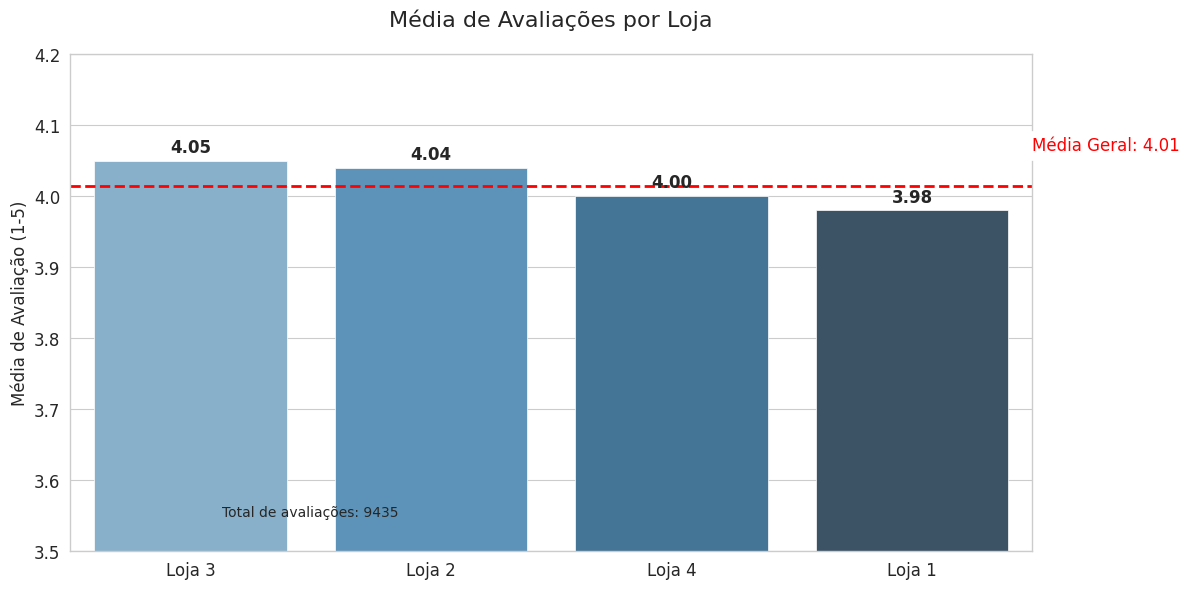

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lojas = {
    'Loja 1': df1,
    'Loja 2': df2,
    'Loja 3': df3,
    'Loja 4': df4
}

medias = []
for nome, df in lojas.items():
    media = df['Avaliação da compra'].mean()
    medias.append({
        'Loja': nome,
        'Média': round(media, 2),
        'Avaliações': len(df)
    })

df_resultados = pd.DataFrame(medias)

print("\nMédia de Avaliações por Loja:")
for idx, row in df_resultados.iterrows():
    print(f"A média das avaliações da {row['Loja']}: {row['Média']:.2f}")

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
paleta = sns.color_palette("Blues_d", n_colors=len(lojas))

ax = sns.barplot(x='Loja', y='Média', data=df_resultados,
                 palette=paleta, order=df_resultados.sort_values('Média', ascending=False)['Loja'])

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                fontweight='bold')

media_geral = pd.concat([df1, df2, df3, df4])['Avaliação da compra'].mean()
plt.axhline(media_geral, color='red', linestyle='--', linewidth=2)
plt.text(3.5, media_geral+0.05, f'Média Geral: {media_geral:.2f}',
         color='red', fontsize=12, backgroundcolor='white')

plt.title('Média de Avaliações por Loja', fontsize=16, pad=20)
plt.xlabel('', fontsize=12)
plt.ylabel('Média de Avaliação (1-5)', fontsize=12)
plt.ylim(3.5, 4.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(0.5, 3.55, f"Total de avaliações: {df_resultados['Avaliações'].sum()}",
         fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

Estilos disponíveis: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Produtos Mais e Menos Vendidos por Loja:


,Loja,Produto Mais Vendido,Quantidade Mais,Produto Menos Vendido,Quantidade Menos
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


/tmp/ipython-input-1448797387.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Quantidade Mais', data=df_resultados,
/tmp/ipython-input-1448797387.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Quantidade Menos', data=df_resultados,


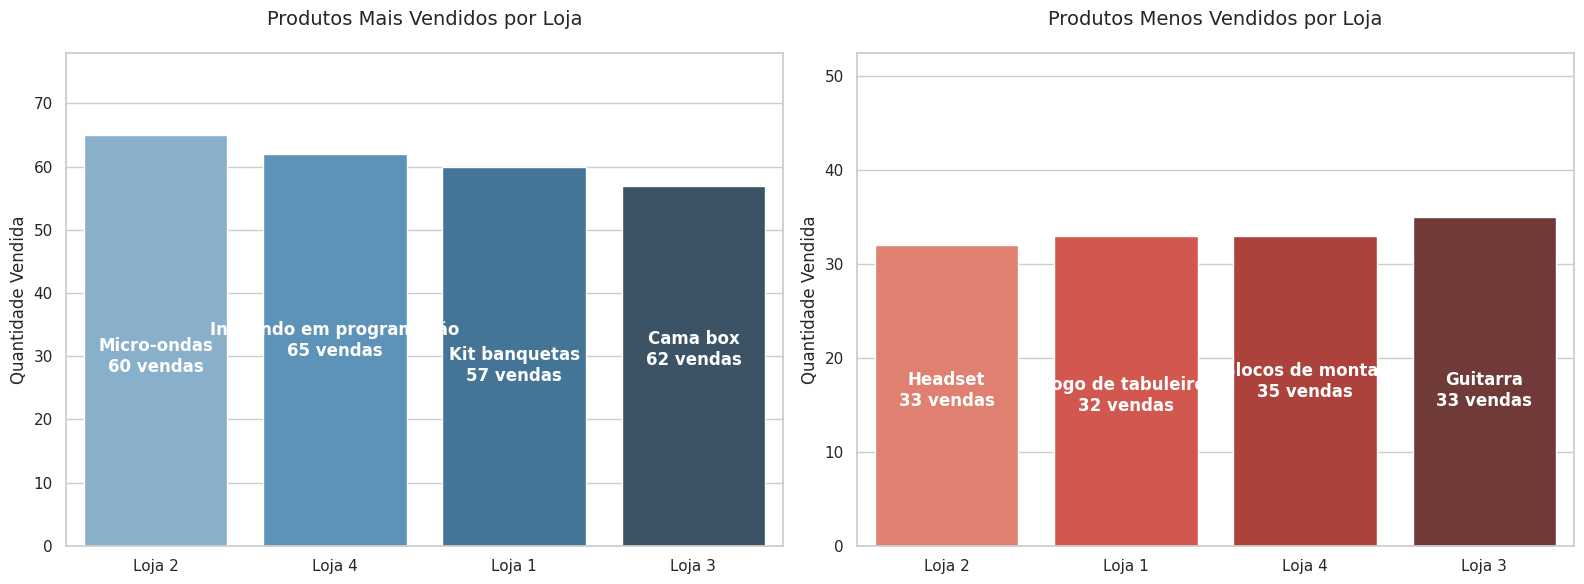

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Estilos disponíveis:", plt.style.available)
plt.style.use('ggplot')

sns.set(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
palette_mais = sns.color_palette("Blues_d", n_colors=4)
palette_menos = sns.color_palette("Reds_d", n_colors=4)

lojas = {
    'Loja 1': df1,
    'Loja 2': df2,
    'Loja 3': df3,
    'Loja 4': df4
}

resultados = []

for nome_loja, df in lojas.items():
    contagem_produtos = df['Produto'].value_counts()

    produto_mais = contagem_produtos.idxmax()
    qtd_mais = contagem_produtos.max()

    produto_menos = contagem_produtos.idxmin()
    qtd_menos = contagem_produtos.min()

    resultados.append({
        'Loja': nome_loja,
        'Produto Mais Vendido': produto_mais,
        'Quantidade Mais': qtd_mais,
        'Produto Menos Vendido': produto_menos,
        'Quantidade Menos': qtd_menos
    })

df_resultados = pd.DataFrame(resultados)

print("\nProdutos Mais e Menos Vendidos por Loja:")
display(df_resultados.style
       .background_gradient(cmap='YlGnBu', subset=['Quantidade Mais', 'Quantidade Menos'])
       .set_properties(**{'text-align': 'left'})
       .set_caption("Desempenho de Produtos por Loja"))

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Loja', y='Quantidade Mais', data=df_resultados,
            palette=palette_mais, order=df_resultados.sort_values('Quantidade Mais', ascending=False)['Loja'])

for i, row in df_resultados.iterrows():
    plt.text(i, row['Quantidade Mais']/2,
             f"{row['Produto Mais Vendido']}\n{row['Quantidade Mais']} vendas",
             ha='center', va='center', color='white', fontweight='bold')

plt.title('Produtos Mais Vendidos por Loja', fontsize=14, pad=20)
plt.xlabel('')
plt.ylabel('Quantidade Vendida')
plt.ylim(0, df_resultados['Quantidade Mais'].max() * 1.2)

plt.subplot(1, 2, 2)
sns.barplot(x='Loja', y='Quantidade Menos', data=df_resultados,
            palette=palette_menos, order=df_resultados.sort_values('Quantidade Menos')['Loja'])

for i, row in df_resultados.iterrows():
    plt.text(i, row['Quantidade Menos']/2,
             f"{row['Produto Menos Vendido']}\n{row['Quantidade Menos']} venda{'s' if row['Quantidade Menos']>1 else ''}",
             ha='center', va='center', color='white', fontweight='bold')

plt.title('Produtos Menos Vendidos por Loja', fontsize=14, pad=20)
plt.xlabel('')
plt.ylabel('Quantidade Vendida')
plt.ylim(0, df_resultados['Quantidade Menos'].max() * 1.5)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


Estatísticas de Frete por Loja:


,Loja,Media,Mediana,Desvio_Padrao,Minimo,Maximo,Qtd_Vendas
3,Loja 4,R$31.28,R$14.61,R$40.37,R$0.00,R$206.33,2358
2,Loja 3,R$33.07,R$15.88,R$41.26,R$0.00,R$211.26,2359
1,Loja 2,R$33.62,R$15.41,R$42.32,R$0.00,R$216.71,2359
0,Loja 1,R$34.69,R$16.50,R$43.81,R$0.00,R$214.38,2359


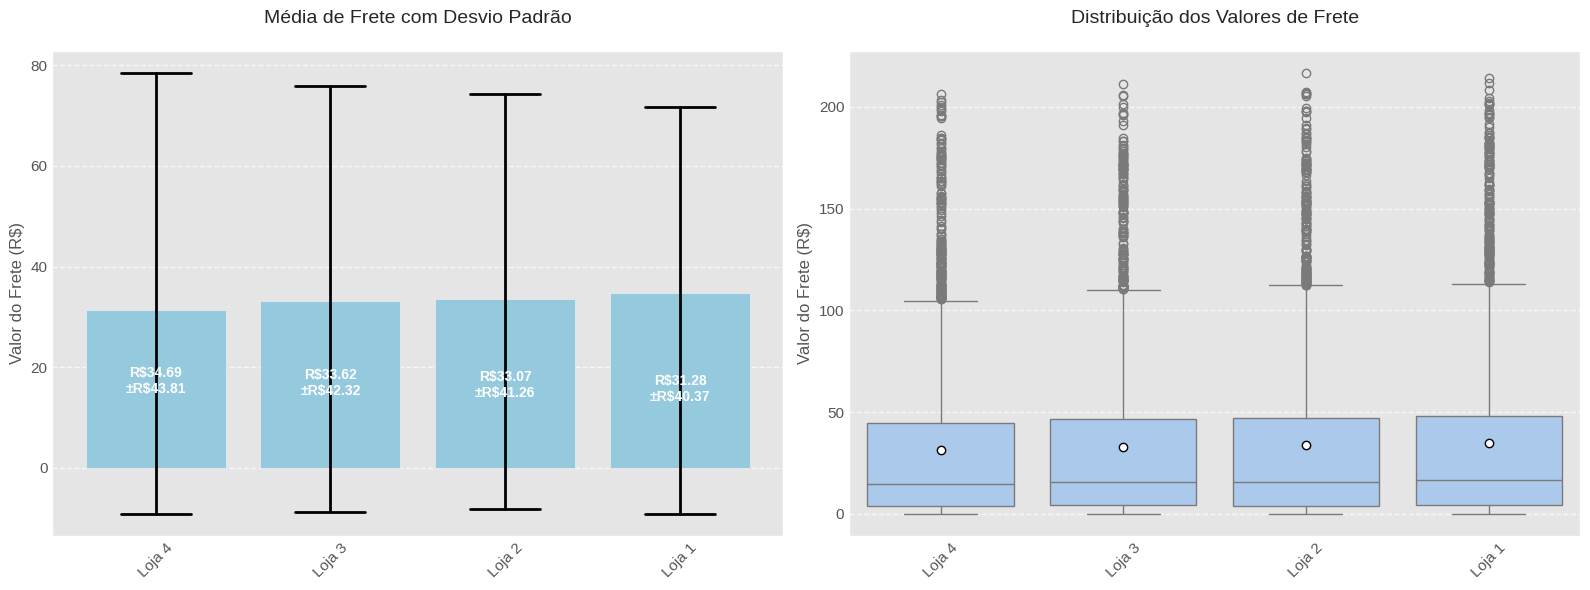

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
plt.style.use('ggplot')
sns.set_palette("pastel")
plt.rcParams['figure.facecolor'] = 'white'

# Dados das lojas
lojas = {
    'Loja 1': df1,
    'Loja 2': df2,
    'Loja 3': df3,
    'Loja 4': df4
}

# Calcular estatísticas de frete (usando nomes sem acentos)
frete_stats = []
for nome_loja, df in lojas.items():
    frete = df['Frete']
    frete_stats.append({
        'Loja': nome_loja,
        'Media': frete.mean(),
        'Mediana': frete.median(),
        'Desvio_Padrao': frete.std(),
        'Minimo': frete.min(),
        'Maximo': frete.max(),
        'Qtd_Vendas': len(df)
    })

# Criar DataFrame com os resultados
df_frete = pd.DataFrame(frete_stats).sort_values('Media')
df_frete['Media'] = df_frete['Media'].round(2)
df_frete['Desvio_Padrao'] = df_frete['Desvio_Padrao'].round(2)

# Exibir tabela formatada
print("Estatísticas de Frete por Loja:")
display(df_frete.style
       .background_gradient(cmap='YlOrRd', subset=['Media'])
       .format({
           'Media': 'R${:.2f}',
           'Mediana': 'R${:.2f}',
           'Desvio_Padrao': 'R${:.2f}',
           'Minimo': 'R${:.2f}',
           'Maximo': 'R${:.2f}',
           'Qtd_Vendas': '{:.0f}'
       })
       .set_caption("Análise Detalhada dos Fretes por Loja"))

# Gráfico de frete médio
plt.figure(figsize=(16, 6))

# Gráfico principal - Média de frete
plt.subplot(1, 2, 1)
ax = sns.barplot(x='Loja', y='Media', data=df_frete,
                order=df_frete['Loja'],
                color='skyblue')

# Adicionar valores e intervalo
for i, row in df_frete.iterrows():
    plt.text(i, row['Media']/2,
             f"R${row['Media']:.2f}\n±R${row['Desvio_Padrao']:.2f}",
             ha='center', va='center',
             color='white', fontweight='bold')

    # Linha de variação
    plt.plot([i, i], [row['Media'] - row['Desvio_Padrao'], row['Media'] + row['Desvio_Padrao']],
             color='black', linewidth=2)
    plt.plot([i-0.2, i+0.2], [row['Media'] - row['Desvio_Padrao'], row['Media'] - row['Desvio_Padrao']],
             color='black', linewidth=2)
    plt.plot([i-0.2, i+0.2], [row['Media'] + row['Desvio_Padrao'], row['Media'] + row['Desvio_Padrao']],
             color='black', linewidth=2)

plt.title('Média de Frete com Desvio Padrão', fontsize=14, pad=20)
plt.ylabel('Valor do Frete (R$)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de distribuição
plt.subplot(1, 2, 2)
all_data = pd.concat([df.assign(Loja=name) for name, df in lojas.items()])
sns.boxplot(x='Loja', y='Frete', data=all_data,
           order=df_frete['Loja'],
           showmeans=True,
           meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

plt.title('Distribuição dos Valores de Frete', fontsize=14, pad=20)
plt.ylabel('Valor do Frete (R$)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##Relatório

Loja a ser vendida: Loja 4

Justificativa:

    Menor faturamento (R$ 1.384.497,58 vs R$ 1.534.509,12 da líder)

    Desempenho medíocre em avaliações (4.00, terceira colocada)

    Apesar do frete baixo, não se traduz em vantagem competitiva significativa

    Mix de produtos menos diversificado que Loja 3

Apesar de a Loja 1 ter o frete mais alto, seu faturamento superior justifica a manutenção, desde que se trabalhe na redução deste custo. A Loja 3 permanece como a mais equilibrada em todos os aspectos.